This notebook shows how to use the Distributions package in order to
- use common probability distributions, thier pdfs, cdfs, means etc.
- simulate random draws from a distribution.

# Distributions

In case you have not installed it yet, add the Distribuions package.

In [1]:
using Pkg
Pkg.add("Distributions")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
 Installed PDMats ──────── v0.9.10
 Installed Distributions ─ v0.21.3
  Updating `~/.julia/environments/v1.2/Project.toml`
  [31c24e10] + Distributions v0.21.3
  Updating `~/.julia/environments/v1.2/Manifest.toml`
  [7d9fca2a] + Arpack v0.3.1
  [31c24e10] + Distributions v0.21.3
  [90014a1f] + PDMats v0.9.10
  [79098fc4] + Rmath v0.5.0
  [276daf66] ↓ SpecialFunctions v0.8.0 ⇒ v0.7.2
  [4c63d2b9] + StatsFuns v0.8.0
  [4607b0f0] + SuiteSparse 


Now we define a distribution, for example, a normal distribution with mean zero and standard deviation 2.

In [2]:
using Distributions

d = Normal(0,2)

┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1242


Normal{Float64}(μ=0.0, σ=2.0)

d is now the normal distribution with mean 2 and standard deviation 2. We can now evaluate, for example, the probability density function of d at some value. Say, we want to know the value of the density at 1.5:

In [3]:
pdf(d,1.5)

0.15056871607740221

or the value of the cumulative density function at 1.7

In [4]:
cdf(d,1.7)

0.8023374568773076

In [5]:
mean(d)

0.0

In [6]:
#variance of d
var(d)

4.0

Now suppose you want to draw a random number from the distribution d:

In [7]:
#one random draw from distribution d
rand(d)

-1.4371755671505708

or maybe draw 20 times randomly from distribution d

In [8]:
rand(d,20)

20-element Array{Float64,1}:
 -1.2337420683416336  
  0.012153180902000904
  1.4009471072407789  
 -0.5478666396196415  
 -1.0519995769444797  
 -0.6666957960190047  
  0.3506775004604972  
  0.06317490186181393 
 -0.29227367331860193 
 -0.1614865542276003  
 -0.8673523553307126  
 -1.5140466843856215  
  1.3658428524764445  
 -0.8572557857852057  
  3.395158769438163   
 -1.7761493523532892  
  2.340687068517632   
  0.6831994587508208  
 -3.8027532790080762  
 -6.366149875226133   

# Histograms

We can use Plots to plot histograms.

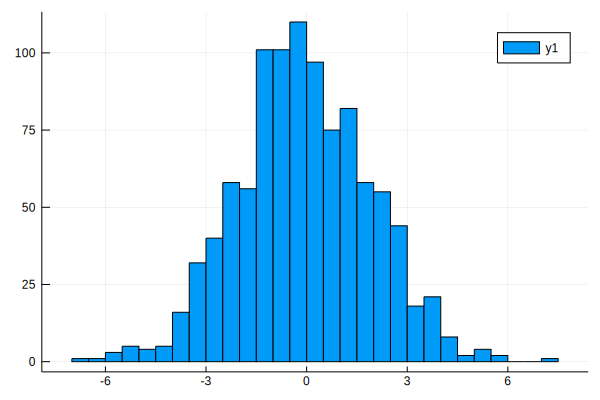

In [9]:
using Plots

histogram(rand(d,1000))

This looks already somewhat like normal. If we increase the number of draws, the resulting  sample distribution looks more like the theoretical one.

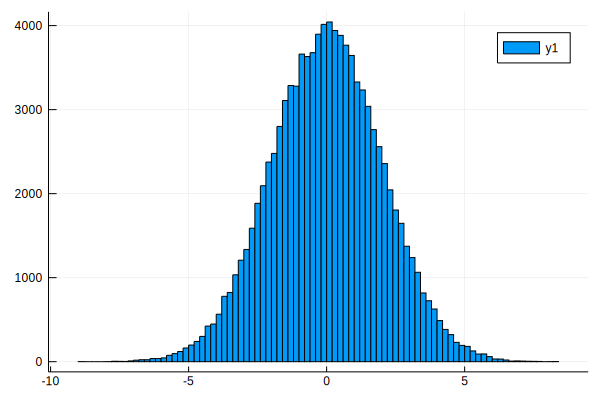

In [10]:
histogram(rand(d,100000))

# Other distributions

Above we used the normal distributions. Of course, Distributions provides other distributions as well. Below some examples.

In [11]:
#uniform distribution between 2 and 4
du = Uniform(2,4)
#print some examples of how to use du
println("du: ",mean(du)," ",pdf(du,2.5)," ",cdf(du,4.0)," ",var(du))

#chi squared distribution with 10 degress of freedom
dchi = Chisq(10)

#t-distribution with 3 degrees of freedom
dt = TDist(3.0)

#exponential with scale parameter 1.0
de = Exponential(1.0)

du: 3.0 0.5 1.0 0.3333333333333333


Exponential{Float64}(θ=1.0)

There also exist discrete distributions.

In [12]:
#Bernoulli with success rate 0.6, i.e. random variable that is 1 with prob 0.6 and 0 with prob 0.4
db = Bernoulli(0.6)
println(mean(db)," ",var(db)," ",pdf(db,0))

#Binomial with success rate 0.6 and 10 repetitions
dbin = Binomial(10,0.6)
println(mean(dbin)," ",var(dbin)," ",pdf(dbin,4))

0.6 0.24 0.4
6.0 2.4000000000000004 0.11147673600000003


# Application: Intertemporal consumption choice

Suppose a consumer faces the following intertemporal consumption problem. He has a wealth of 100 today and has to decide how much he consumes today and how much he consumes tomorrow (the world ends after tomorrow, i.e. there is only consumption in period 1 or 2 and no other choice). The consumer derives utility $\sqrt{c}$ by consuming $c$ in a given period and discounts the future with discount factor $0.9$. The interesting bit is that tomorrow he will get a random income $m$ which we assume to be distributed according to $\chi^2$ distribution with 25 degres of freedom.

The consumer's problem is therefore
$$\max_c \mathbb{E}_m\left[\sqrt{c}+0.9*\sqrt{100-c+m}\right]$$
Of course, one can solve this analytically but here we will go another route. We will solve this problem using Optim and we will evaluate the expectation using integration with quadgk.

In [14]:
using Optim
using QuadGK

#define distribution of m
md = Chisq(25)

function objective(c)
    integrand(m) = (sqrt(c)+0.9*sqrt(100-c+m))*pdf(md,m)
    return -quadgk(integrand,0,Inf)[1] #"-" because Optim searches for a minimizer
end

optimize(objective,0.0,100.0)

Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [0.000000, 100.000000]
 * Minimizer: 6.870476e+01
 * Minimum: -1.502850e+01
 * Iterations: 12
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.5e-08*|x|+2.2e-16): true
 * Objective Function Calls: 13

So the result is to consume approximately 68.7 units today and save the rest.